# CSE 574: Homework 4

### Glenn Thomakos

I certify that the code and data in this assignment were generated independently,
using only the tools and resources defined in the course and that I did not receive
any external help, coaching or contributions during the production of this work.

## Part 1: Define an RL Environment

In this part, we will define a grid-world reinforcement learning environment as an MDP.
While building an RL environment, you need to define possible states, actions, rewards
and other parameters.

#### Step 1: Choose a scenario for your grid world. You are welcome to use Visualization demo as a reference to visualize it.

The scenario here is a pretty standard, generic grid. The rewards (each scoring +12 points) can be found at coordinates (3,1) and (3,0) and are colored green. Penalties (carrying penalties of -12 points) are found at coordinates (1,2) and (0,3) while being colored yellow. Furthermore, each step incurs a penalty of -1 point in order to encourage a quicker resolution of the grid world.

The ultimate objective of this grid world is to finish the grid by reaching (3,3) (a dark blue square) which scores 120 points before hitting the maximum timesteps of 20, while also picking up as many rewards as possible in as few steps as possible.

The agent begins at (0,0), is colored light blue and can move up, down, left, or right.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

#### Step 2: Define an RL environment following the scenario that you chose.

This environment is created with 16 states (a 4x4 grid), 4 possible actions, as well as 2 penalty squares, 2 reward squares, a penalty for each movement (which can be considered an omnipresent -1 penalty on each square), and a final reward on the terminal square for a total of 6 different rewards.

Below the class definition is the visualization of the grid world.

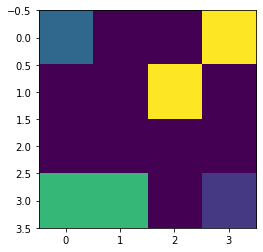

In [30]:
class GridEnvironment(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4) 
        self.max_timesteps = 20
        
    def reset(self):
        self.timestep = 0
        self.agent_pos = [0,0]
        self.penalty_1_available = True
        self.penalty_2_available = True
        self.reward_1_available = True
        self.reward_2_available = True
        self.penalty_pos_1 = [1,2]
        self.penalty_pos_2 = [0,3]
        self.reward_pos_1 = [3,1]
        self.reward_pos_2 = [3,0]
        self.goal_pos = [3,3]
        self.reward = 0
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.penalty_pos_1)] = 3
        self.state[tuple(self.penalty_pos_2)] = 3
        self.state[tuple(self.reward_pos_1)] = 2
        self.state[tuple(self.reward_pos_2)] = 2
        observation = self.state
        return observation
        
    def step(self,action):
        if action==0: # Agent moves down
            self.agent_pos[0]+=1
        if action==1: # Agent moves up
            self.agent_pos[0]-=1
        if action==2: # Agent moves right
            self.agent_pos[1]+=1
        if action==3: # Agent moves left
            self.agent_pos[1]-=1
            
        self.agent_pos = np.clip(self.agent_pos,0,3) # Prevents agent from going out of bounds
        self.state = np.zeros((4,4))

        self.state[tuple(self.goal_pos)] = 0.5
        if self.penalty_1_available:
            self.state[tuple(self.penalty_pos_1)] = 3
        if self.penalty_2_available:
            self.state[tuple(self.penalty_pos_2)] = 3
        if self.reward_1_available:
            self.state[tuple(self.reward_pos_1)] = 2
        if self.reward_2_available:
            self.state[tuple(self.reward_pos_2)] = 2
        self.state[tuple(self.agent_pos)] = 1
        observation = self.state
        
        agent_at_goal = (self.agent_pos==self.goal_pos).all()
        if agent_at_goal:
            self.reward+=120
            
        if (self.agent_pos==self.penalty_pos_1).all() & self.penalty_1_available:
            self.reward-=12
            self.penalty_1_available = False
        if (self.agent_pos==self.penalty_pos_2).all() & self.penalty_2_available:
            self.reward-=12
            self.penalty_2_available = False
        if (self.agent_pos==self.reward_pos_1).all() & self.reward_1_available:
            self.reward+=12
            self.reward_1_available = False
        if (self.agent_pos==self.reward_pos_2).all() & self.reward_2_available:
            self.reward+=12
            self.reward_2_available = False
        
        self.timestep+=1
        self.reward-=1 # To incentivize a quicker finish
        done = True if (self.timestep>=self.max_timesteps) | agent_at_goal else False
        
        return observation, self.reward, done
    
    def render(self):
        plt.imshow(self.state)
        plt.show()

env = GridEnvironment()
env.reset()
env.render()

#### Step 3: Run a random agent for at least 10 timesteps to show that the environment logic is defined correctly. Print the current state, chosen action, reward, and return your grid world visualization for each step.

In [3]:
class RandomAgent:
    def __init__(self,env):
        self.env = env
        self.observation_space = env.observation_space
        self.action_space = env.action_space
    
    def step(self,observation):
        return np.random.choice(self.action_space.n)

Action=2
(array([[0. , 1. , 0. , 3. ],
       [0. , 0. , 3. , 0. ],
       [0. , 0. , 0. , 0. ],
       [2. , 2. , 0. , 0.5]]), -1, False)


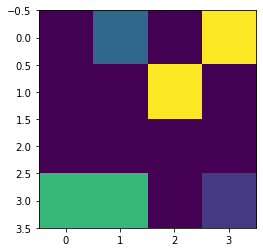

Action=0
(array([[0. , 0. , 0. , 3. ],
       [0. , 1. , 3. , 0. ],
       [0. , 0. , 0. , 0. ],
       [2. , 2. , 0. , 0.5]]), -2, False)


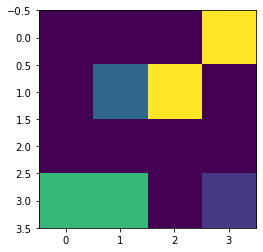

Action=1
(array([[0. , 1. , 0. , 3. ],
       [0. , 0. , 3. , 0. ],
       [0. , 0. , 0. , 0. ],
       [2. , 2. , 0. , 0.5]]), -3, False)


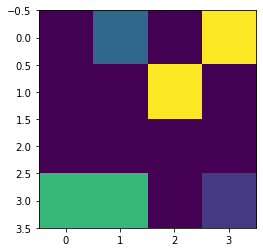

Action=3
(array([[1. , 0. , 0. , 3. ],
       [0. , 0. , 3. , 0. ],
       [0. , 0. , 0. , 0. ],
       [2. , 2. , 0. , 0.5]]), -4, False)


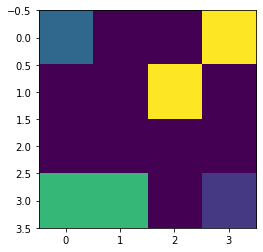

Action=0
(array([[0. , 0. , 0. , 3. ],
       [1. , 0. , 3. , 0. ],
       [0. , 0. , 0. , 0. ],
       [2. , 2. , 0. , 0.5]]), -5, False)


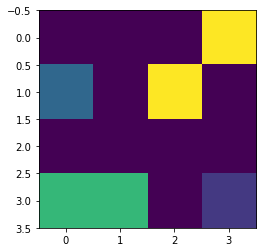

Action=0
(array([[0. , 0. , 0. , 3. ],
       [0. , 0. , 3. , 0. ],
       [1. , 0. , 0. , 0. ],
       [2. , 2. , 0. , 0.5]]), -6, False)


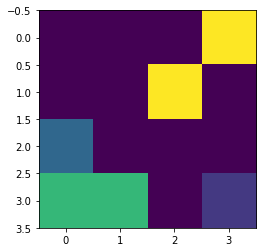

Action=0
(array([[0. , 0. , 0. , 3. ],
       [0. , 0. , 3. , 0. ],
       [0. , 0. , 0. , 0. ],
       [1. , 2. , 0. , 0.5]]), 5, False)


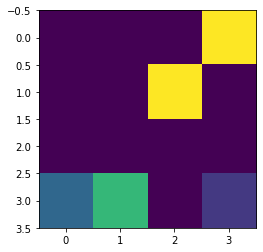

Action=1
(array([[0. , 0. , 0. , 3. ],
       [0. , 0. , 3. , 0. ],
       [1. , 0. , 0. , 0. ],
       [0. , 2. , 0. , 0.5]]), 4, False)


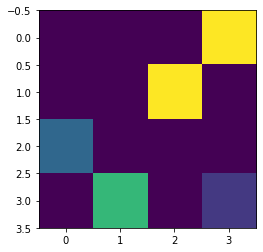

Action=1
(array([[0. , 0. , 0. , 3. ],
       [1. , 0. , 3. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 2. , 0. , 0.5]]), 3, False)


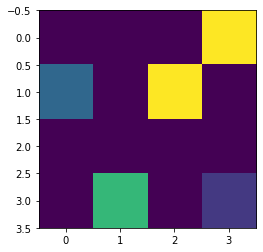

Action=3
(array([[0. , 0. , 0. , 3. ],
       [1. , 0. , 3. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 2. , 0. , 0.5]]), 2, False)


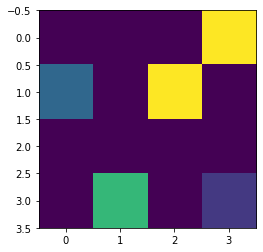

In [4]:
env = GridEnvironment()
agent = RandomAgent(env)
obs = env.reset()

np.random.seed(3)
for i in range(10):
    action = agent.step(obs)
    print('Action='+str(action))
    print(env.step(action))
    env.render()

## Part II: Solve your environment using a tabular method - SARSA

The algorithm is defined and executed here. The parameters were chosen as below:

* $\alpha=0.06$

* $\epsilon=0.12$

* $\epsilon-decay=0.0012$

* $\epsilon-minimum=0.0001$

* $Episodes=3000$

In [57]:
def sarsa(env,alpha,gamma,epsilon,epsilon_decay,epsilon_min,episodes):
    np.random.seed(12)
    Q = np.zeros((env.observation_space.n,env.action_space.n))
    epsilon_list = []
    reward_list = []
    for i in range(episodes):
        state = env.reset()
        if np.random.uniform()>epsilon:
            action = np.argmax(Q[(env.agent_pos[0]*4)+env.agent_pos[1]])
        else:
            action = np.random.choice(env.action_space.n)
        done = False
        while not done:
            flat_agent_pos = (env.agent_pos[0]*4)+env.agent_pos[1]
            new_state,reward,done = env.step(action)
            new_flat_agent_pos = (env.agent_pos[0]*4)+env.agent_pos[1]
            if np.random.uniform()>epsilon:
                new_action = np.argmax(Q[(env.agent_pos[0]*4)+env.agent_pos[1]])
            else:
                new_action = np.random.choice(env.action_space.n)
            Q[flat_agent_pos,action] = Q[flat_agent_pos,action]+(alpha*reward+(gamma*Q[new_flat_agent_pos,new_action])-Q[flat_agent_pos,action])
            state = new_state
            action = new_action
        epsilon_list.append(epsilon)
        reward_list.append(reward)
        if epsilon>epsilon_min:
            epsilon-=epsilon_decay
    return Q,epsilon_list,reward_list

policy,epsilon_list,reward_list = sarsa(env=GridEnvironment(),
                                          alpha=0.12,
                                          gamma=0.9,
                                          epsilon=0.12,
                                          epsilon_decay=0.0012,
                                          epsilon_min=0.0001,
                                          episodes=3000)

Below is a plot of the descent of epsilon as the episodes increased. Following that is the amount of reward each episode generates.

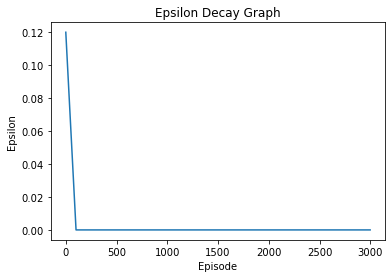

In [58]:
plt.plot(epsilon_list)
plt.title('Epsilon Decay Graph')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

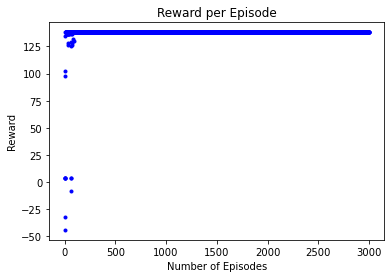

In [59]:
plt.plot(reward_list,'b.')
plt.title('Reward per Episode')
plt.xlabel('Number of Episodes')
plt.ylabel('Reward')
plt.show()

The array and plot created below are 10 episodes of a greedy algorithm (which is essentially just SARSA with $\epsilon =0$ and $decay=0$). Evidently, the algorithm has converged.

[138, 138, 138, 138, 138, 138, 138, 138, 138, 138]


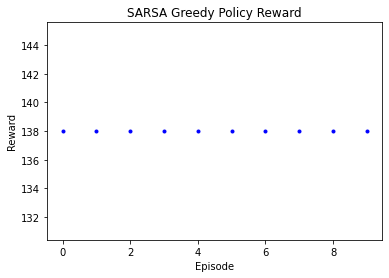

In [60]:
env = GridEnvironment()
greedy_reward_list = []
for i in range(10):
    env.reset()
    done = False
    while not done:
        flat_agent_pos = (env.agent_pos[0]*4)+env.agent_pos[1]
        greedy_action = np.argmax(policy[flat_agent_pos])
        new_state,reward,done = env.step(greedy_action)
        if done:
            greedy_reward_list.append(reward)
print(greedy_reward_list)
plt.plot(greedy_reward_list,'b.')
plt.title('SARSA Greedy Policy Reward')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

The distinction between SARSA and Q-Learning is in how they choose their next actions. SARSA follows a policy while Q-learning will choose the next step which has the highest reward. In the case of an epsilon-greedy policy, when $\epsilon =0$ then SARSA and Q-learning are the same.

## Hyperparameter Tuning:

### Alpha:

It's plain to see from these graphs below that a change to alpha has little to no discernible effect on the convergence rate or the reward of this particular environment.

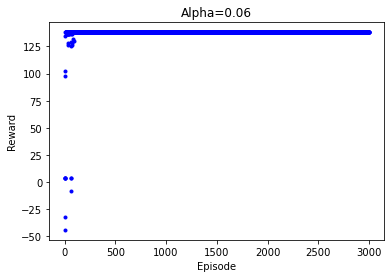

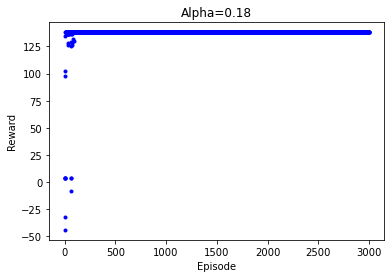

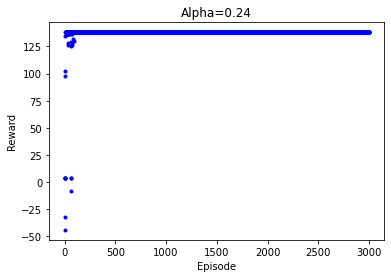

In [61]:
alpha_list = [0.06,0.18,0.24]
for i in alpha_list:
    policy,epsilon_list,reward_list_alpha = sarsa(env=GridEnvironment(),
                                              alpha=i,
                                              gamma=0.9,
                                              epsilon=0.12,
                                              epsilon_decay=0.0012,
                                              epsilon_min=0.0001,
                                              episodes=3000)
    plt.plot(reward_list_alpha,'b.')
    plt.title('Alpha='+str(i))
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()

### Epsilon:

A change in Epsilon has a far more noticeable change when it comes to both rate of convergence and even what the algorithm converges to. Each epsilon tried here converged to a reward that wasn't even the optimal reward for the environment.

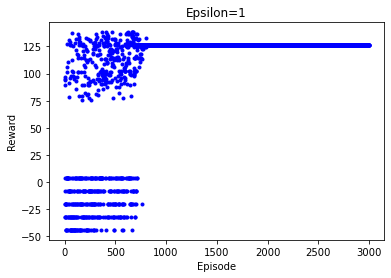

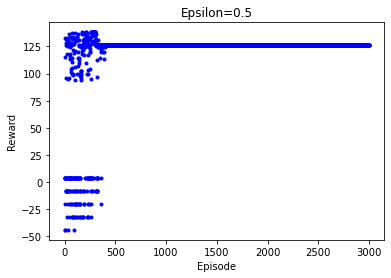

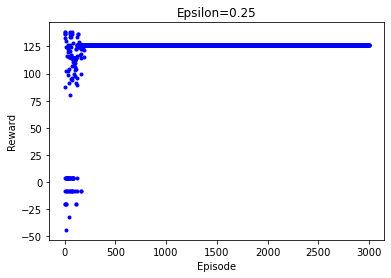

In [63]:
epsilons = [1,0.5,0.25]
for i in epsilons:
    policy,epsilon_list,reward_list_epsilon = sarsa(env=GridEnvironment(),
                                              alpha=0.12,
                                              gamma=0.9,
                                              epsilon=i,
                                              epsilon_decay=0.0012,
                                              epsilon_min=0.0001,
                                              episodes=3000)
    plt.plot(reward_list_epsilon,'b.')
    plt.title('Epsilon='+str(i))
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()

### Gamma:

Although changing gamma doesn't have a similar effect on the rate of convergence that epsilon does, it can have disastrous effects on what the algorithm converges too. Only a gamma of 0.5 (and 0.9 in the base model) had the actually correct optimal value of reward convergence.

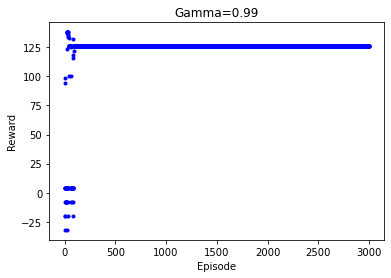

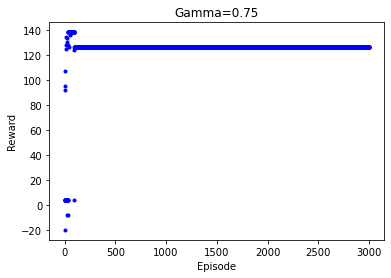

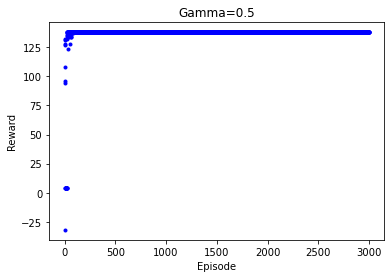

In [66]:
gammas = [0.99,0.75,0.5]
for i in gammas:
    policy,epsilon_list,reward_list_gamma = sarsa(env=GridEnvironment(),
                                              alpha=0.12,
                                              gamma=i,
                                              epsilon=0.12,
                                              epsilon_decay=0.0012,
                                              epsilon_min=0.0001,
                                              episodes=3000)
    plt.plot(reward_list_gamma,'b.')
    plt.title('Gamma='+str(i))
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.show()

## References:

* https://piazza.com/class_profile/get_resource/kyxwxncdc4281/l27uduu4i0b589 - Random Agent Code

* https://piazza.com/class_profile/get_resource/kyxwxncdc4281/l20w3y3q82x3xg - Environment Demo Code